# BANK MARKETING

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # data definition:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports, Data & EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='age', ylabel='Count'>

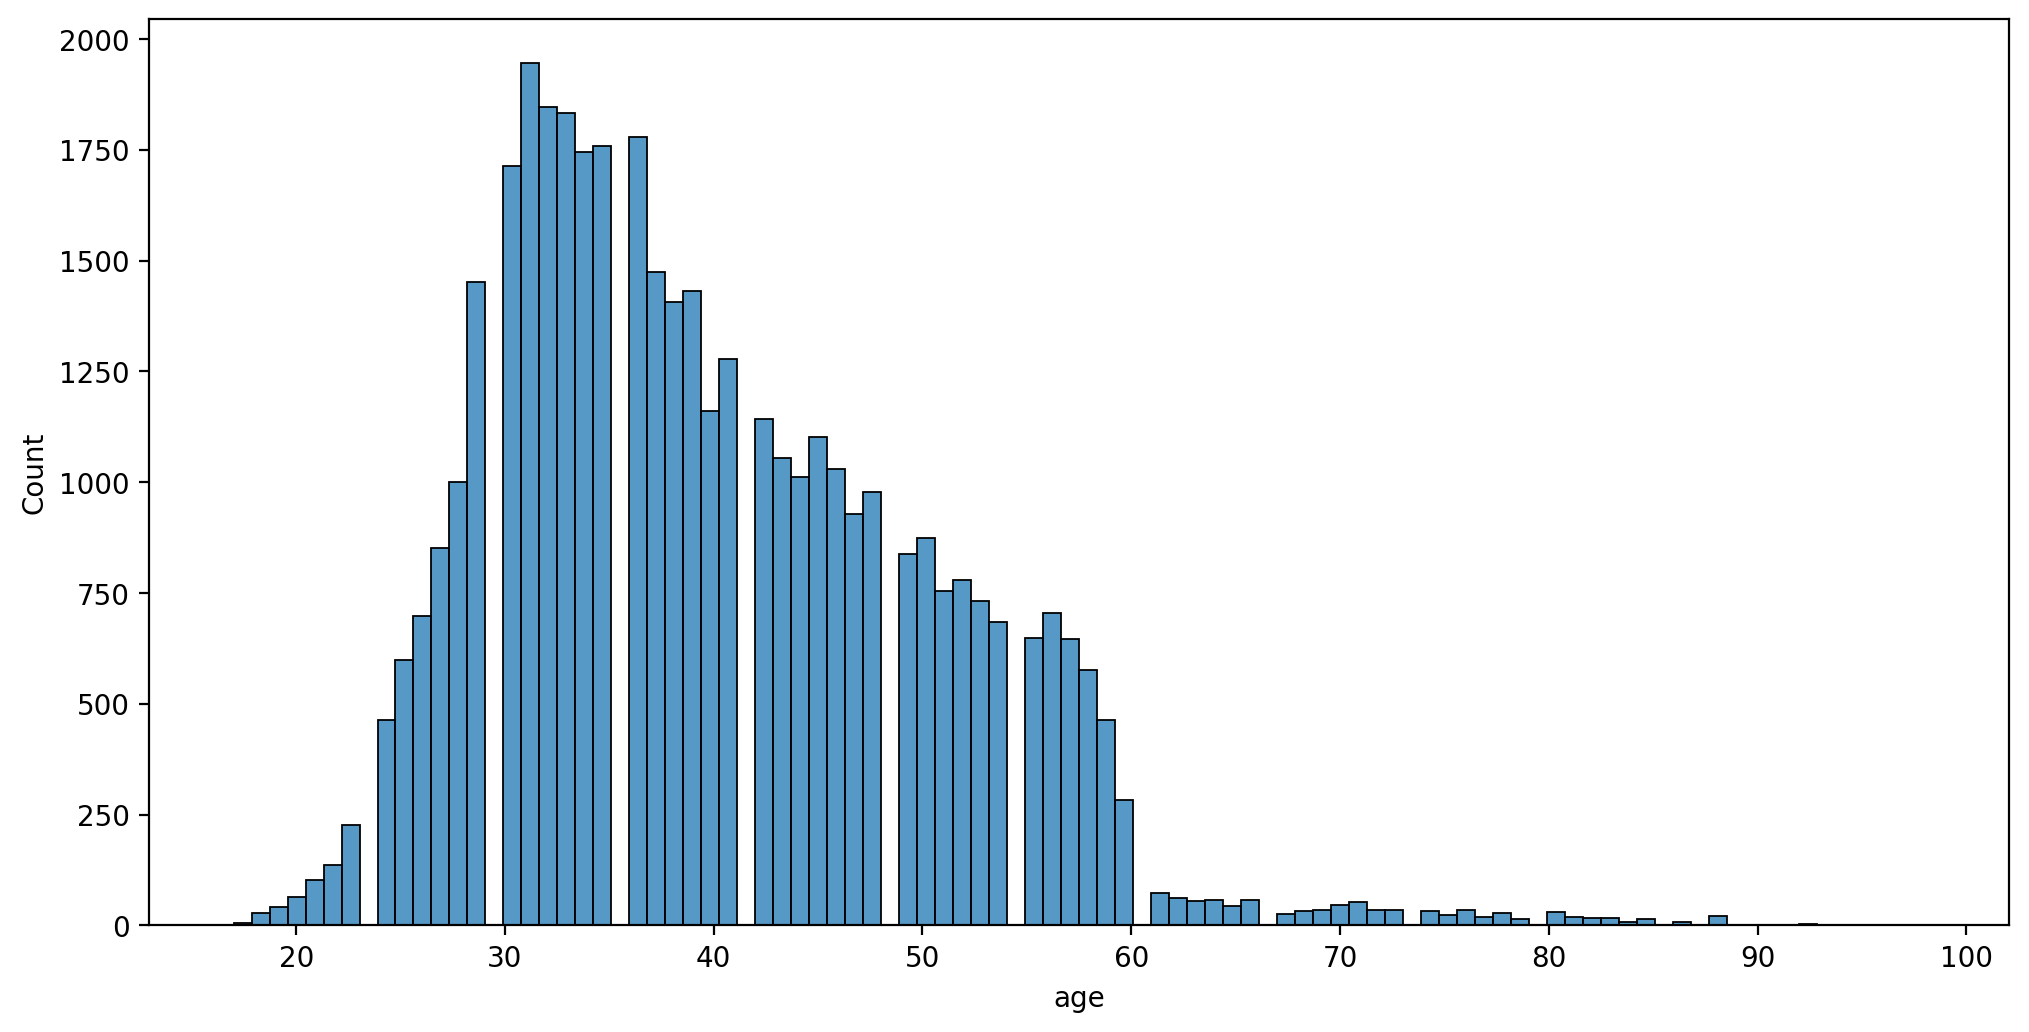

In [5]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

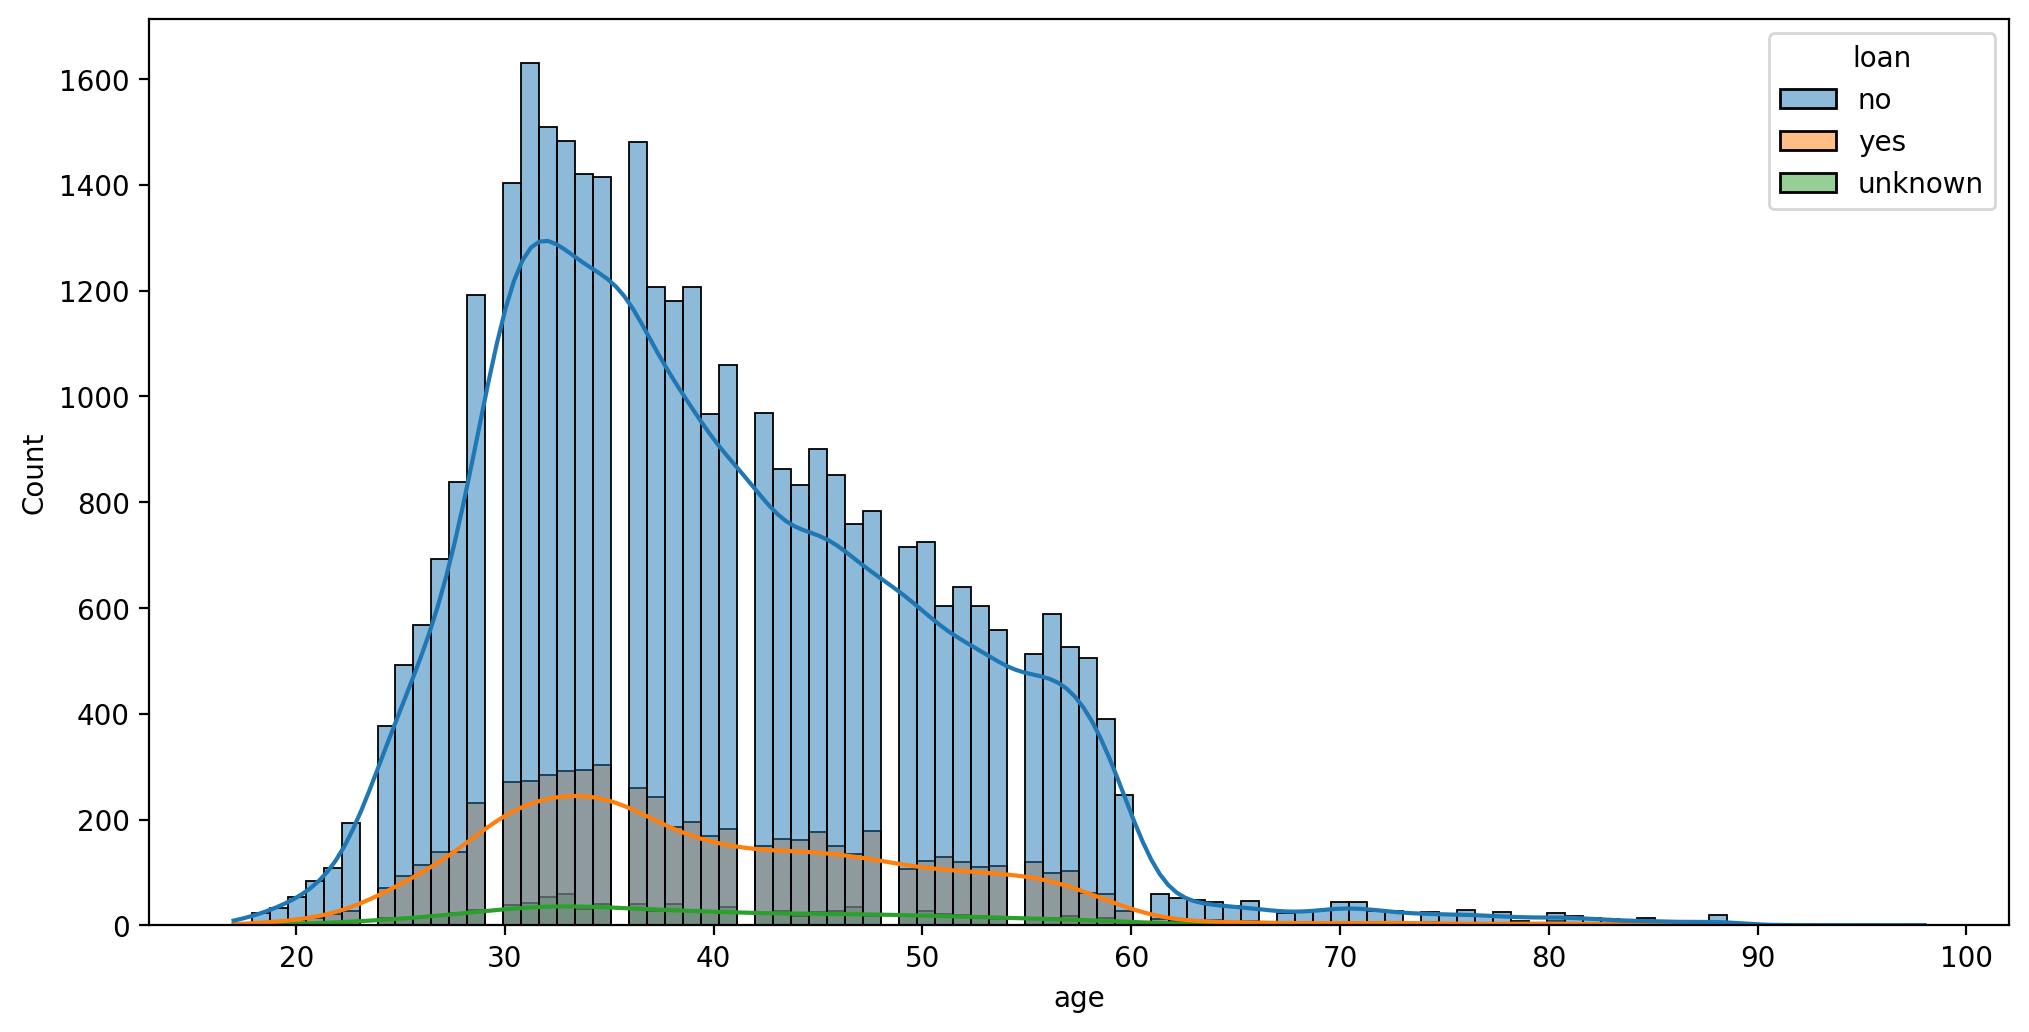

In [6]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x="age", hue="loan", kde=True)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

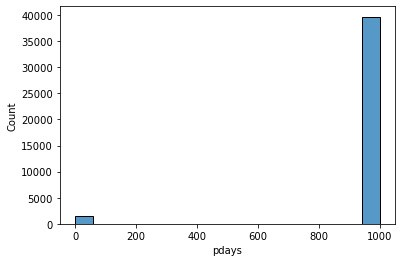

In [7]:
sns.histplot(data=df,x='pdays')
#sıkışık oldupu için 999günlük ödemeyi çıkaracağız
# 999 ödeme yapmayanlar için girilen değer.

<AxesSubplot:xlabel='pdays', ylabel='Count'>

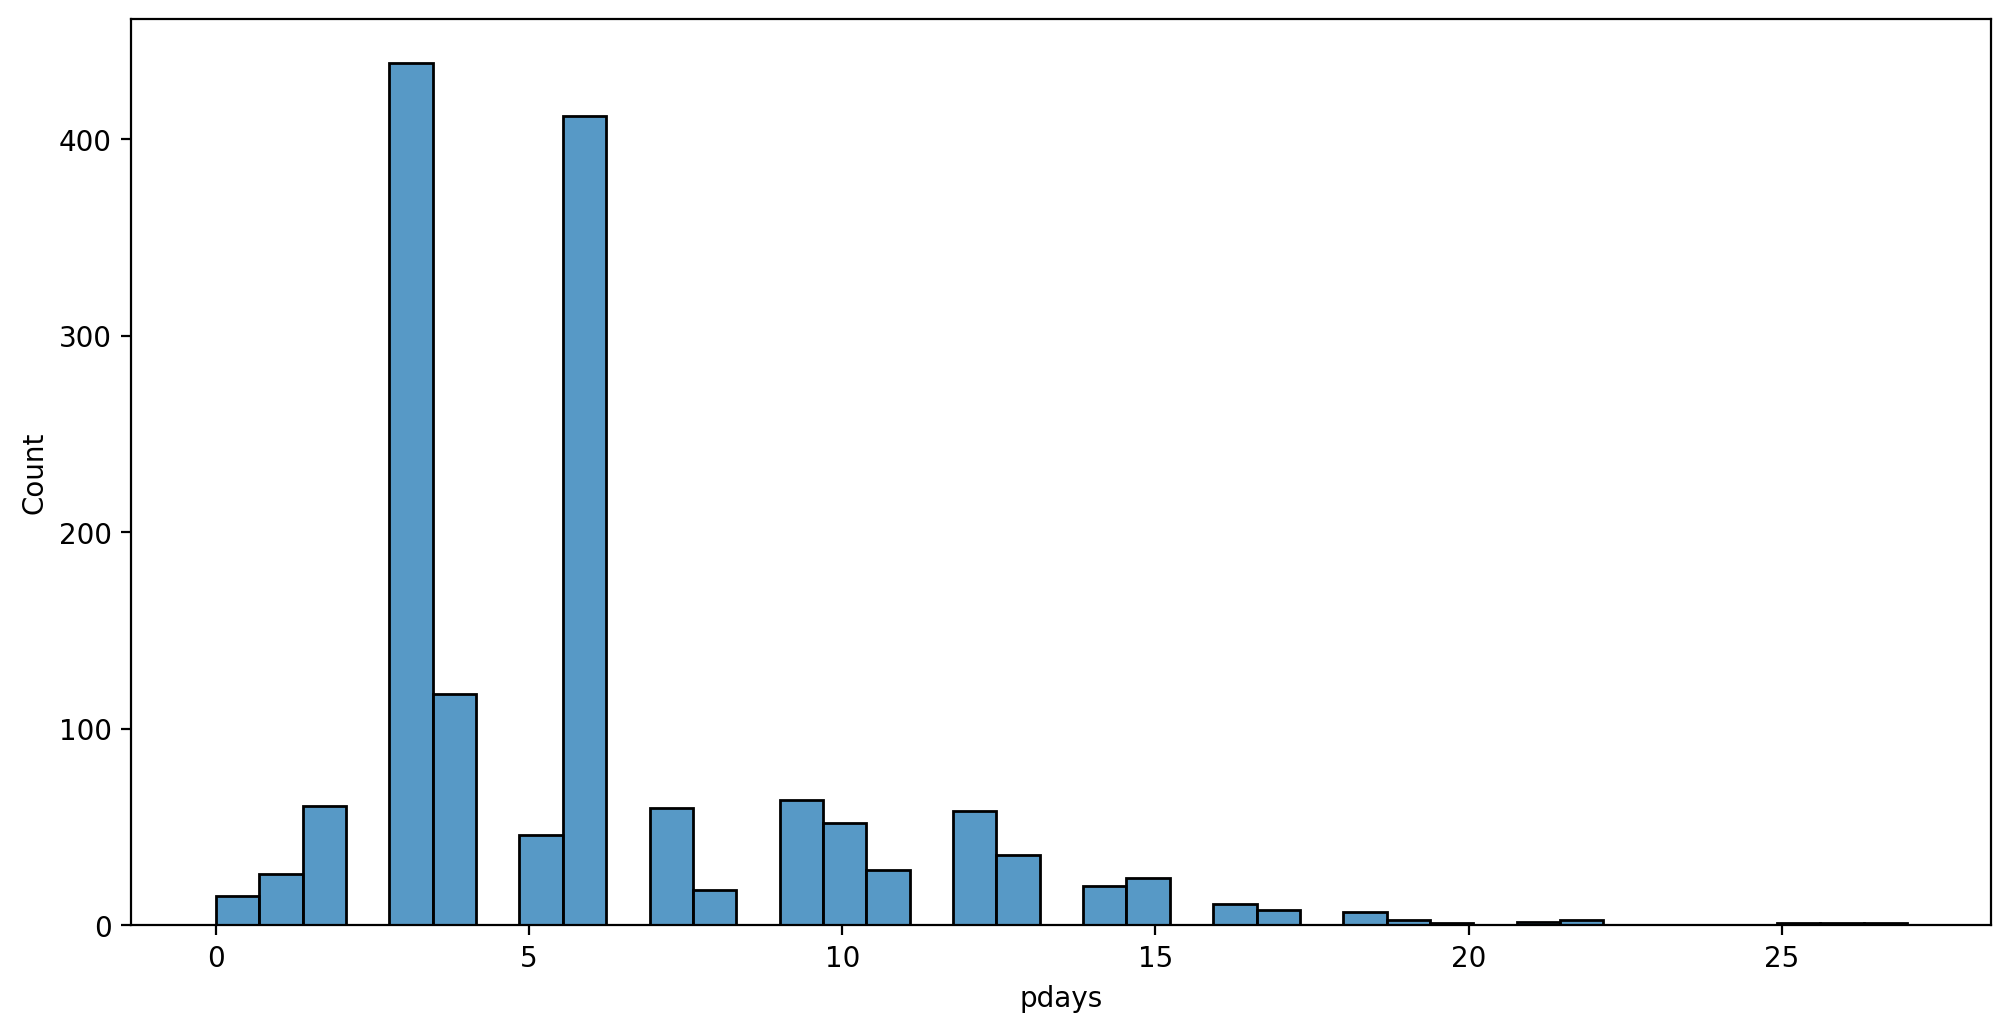

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!= 999],x="pdays")

(0.0, 500.0)

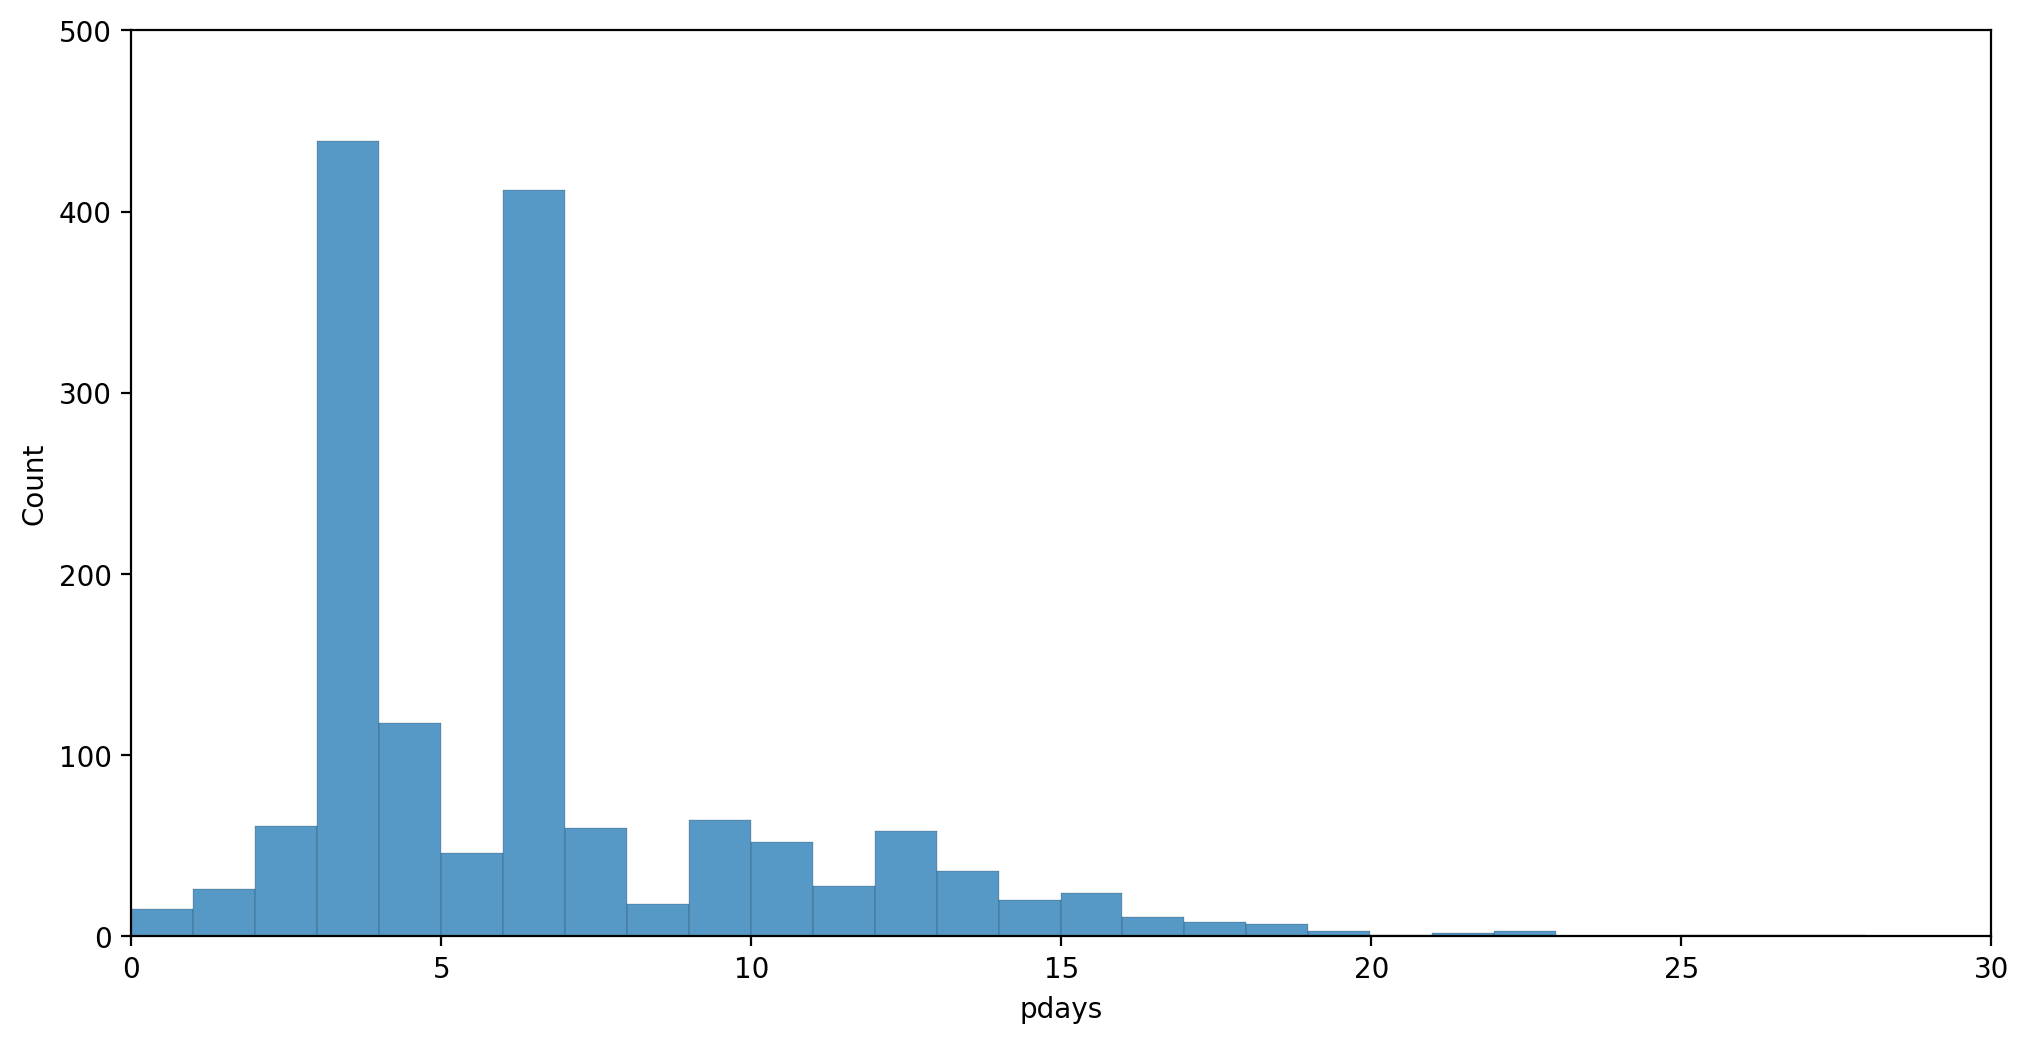

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="pdays",bins=1000)
plt.xlim(0,30)
plt.ylim(0,500)
# Bu da olur ama mantıklı değil

In [10]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

(0.0, 2000.0)

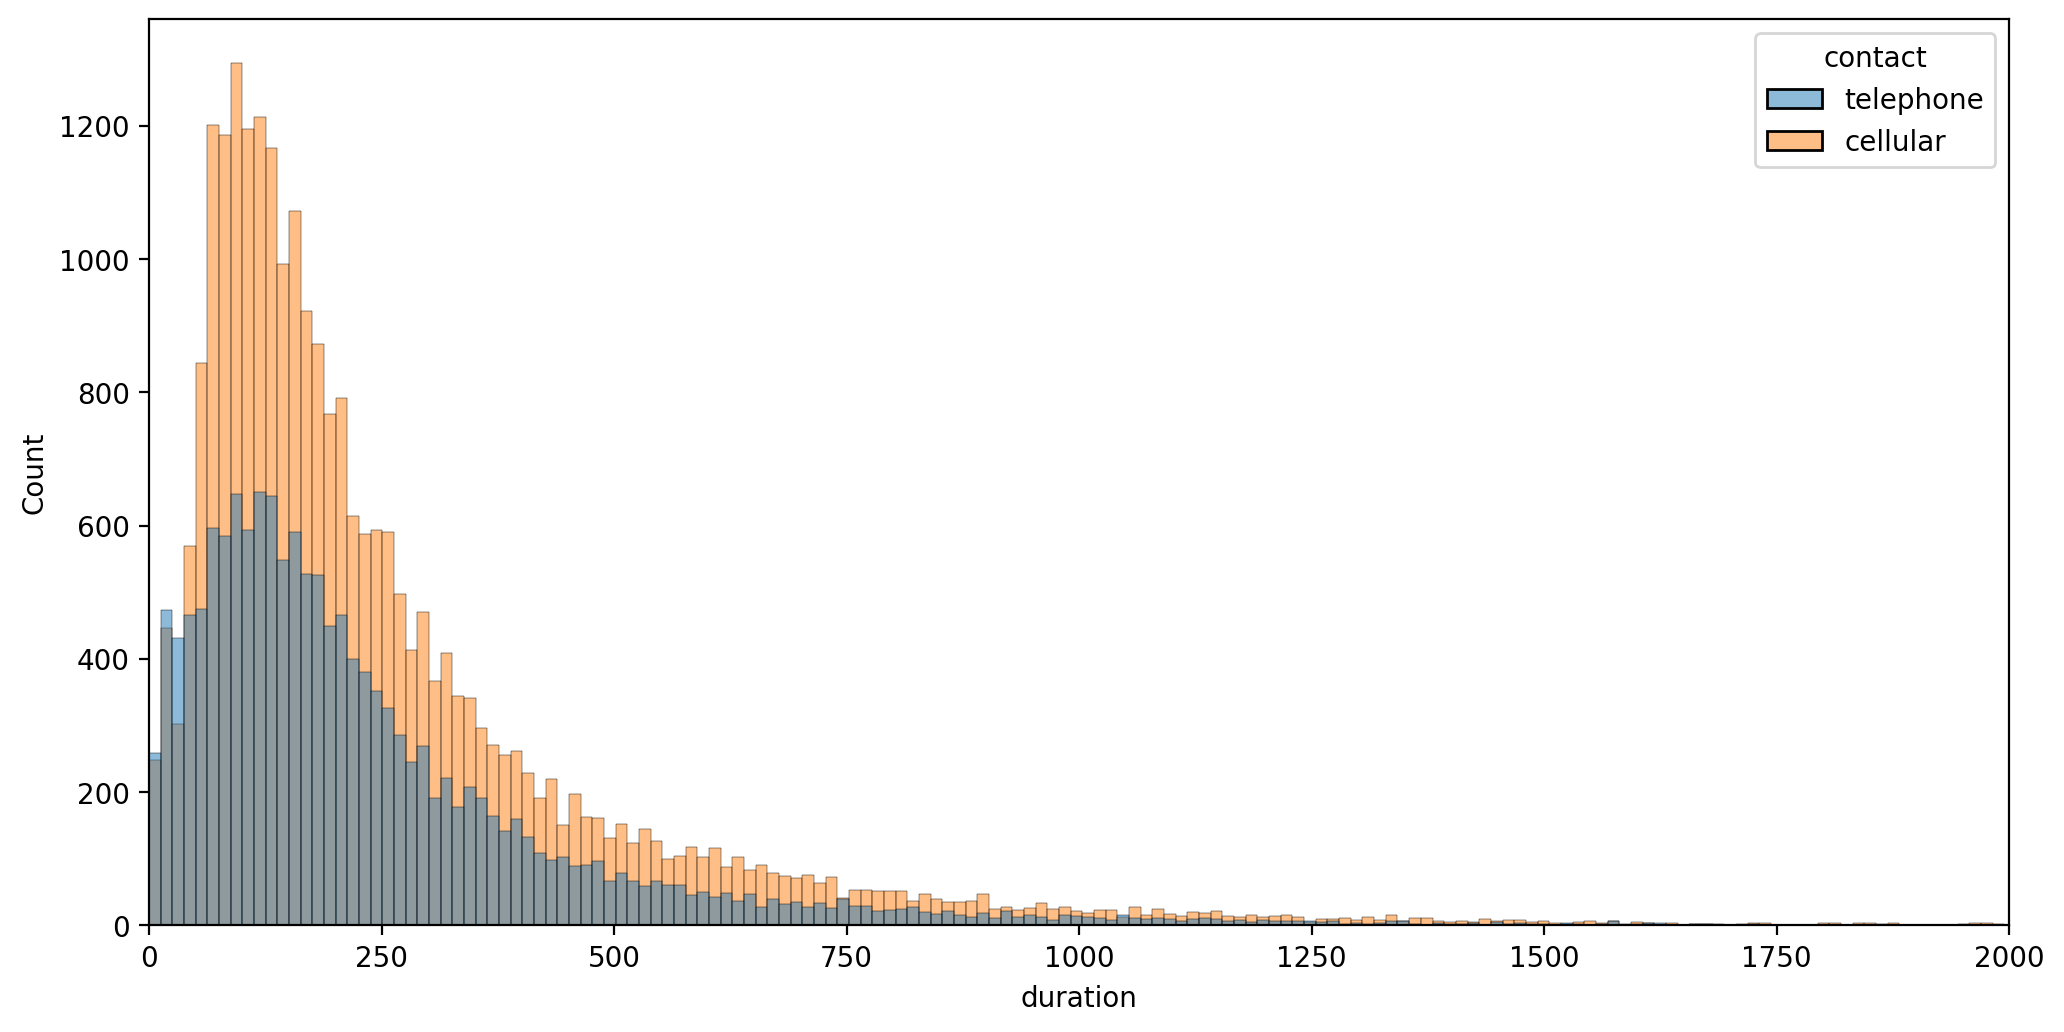

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)


<AxesSubplot:xlabel='previous', ylabel='count'>

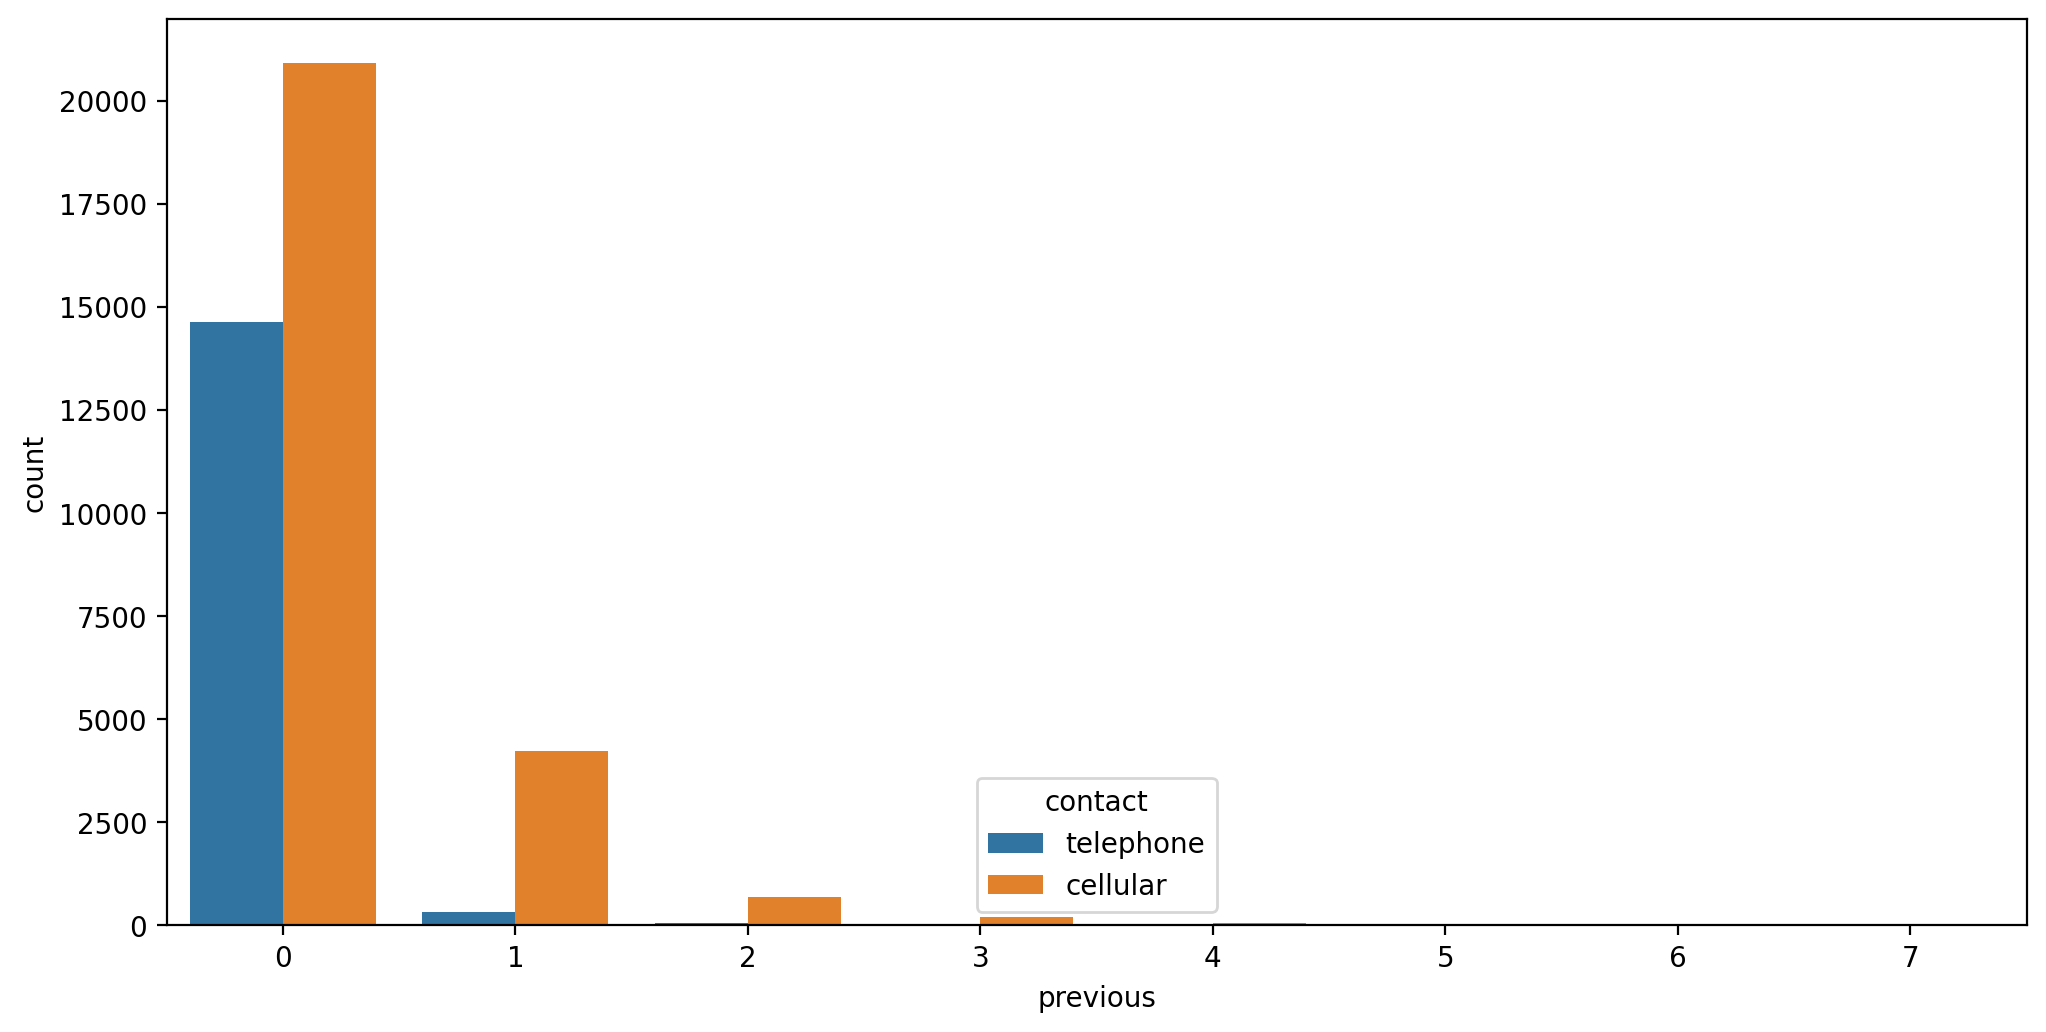

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<AxesSubplot:xlabel='contact', ylabel='count'>

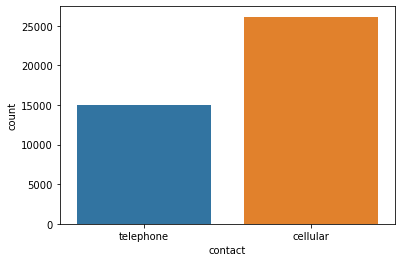

In [13]:
sns.countplot(data=df,x='contact')

In [14]:
df['previous'].value_counts().sum()

41188

In [15]:
df['previous'].value_counts().sum()-36954
# 36954 vs. 8257

4234

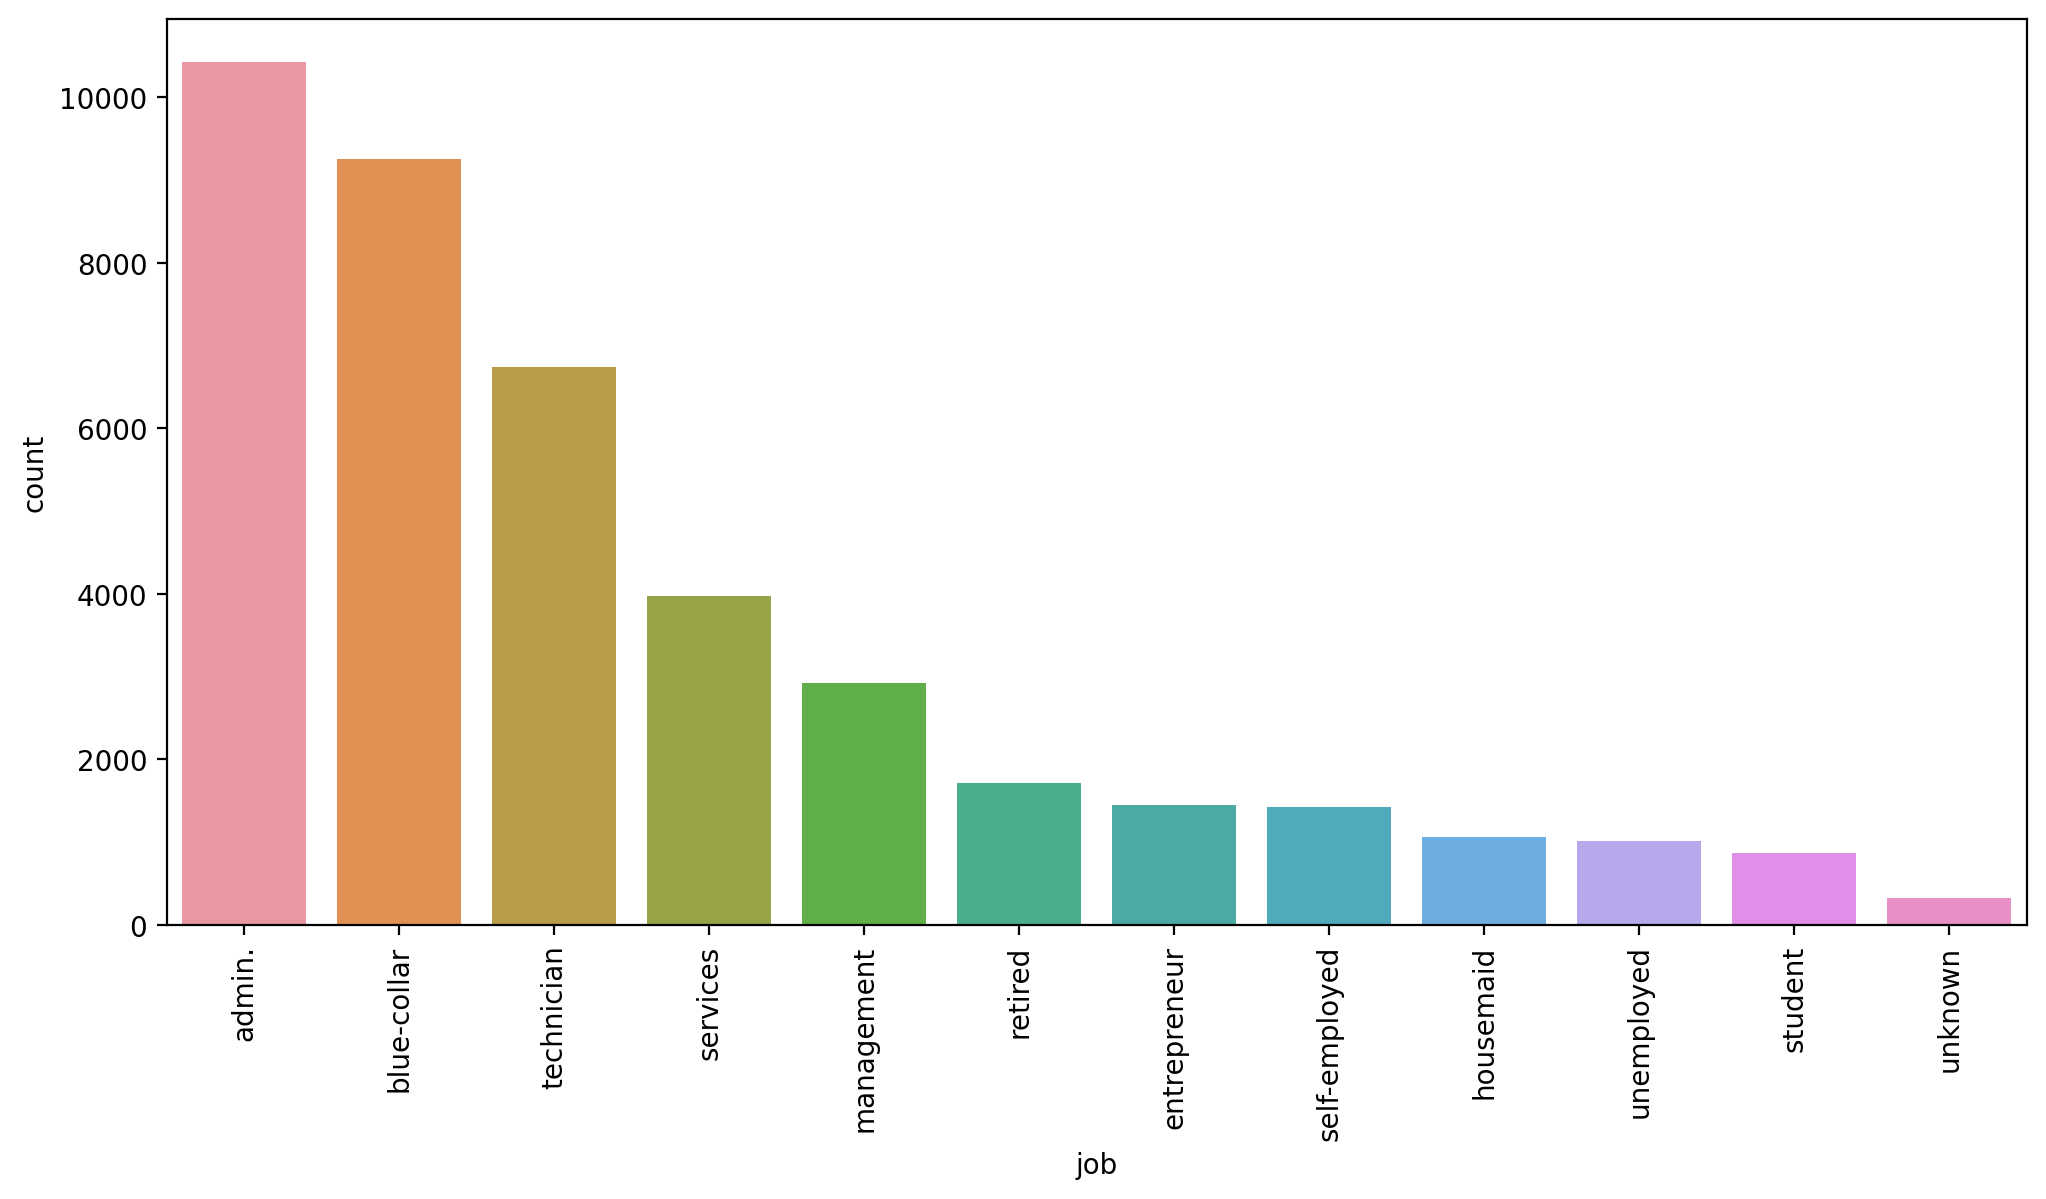

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x="job", order=df["job"].value_counts().index)
plt.xticks(rotation=90);
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
# buna da bakarsın.

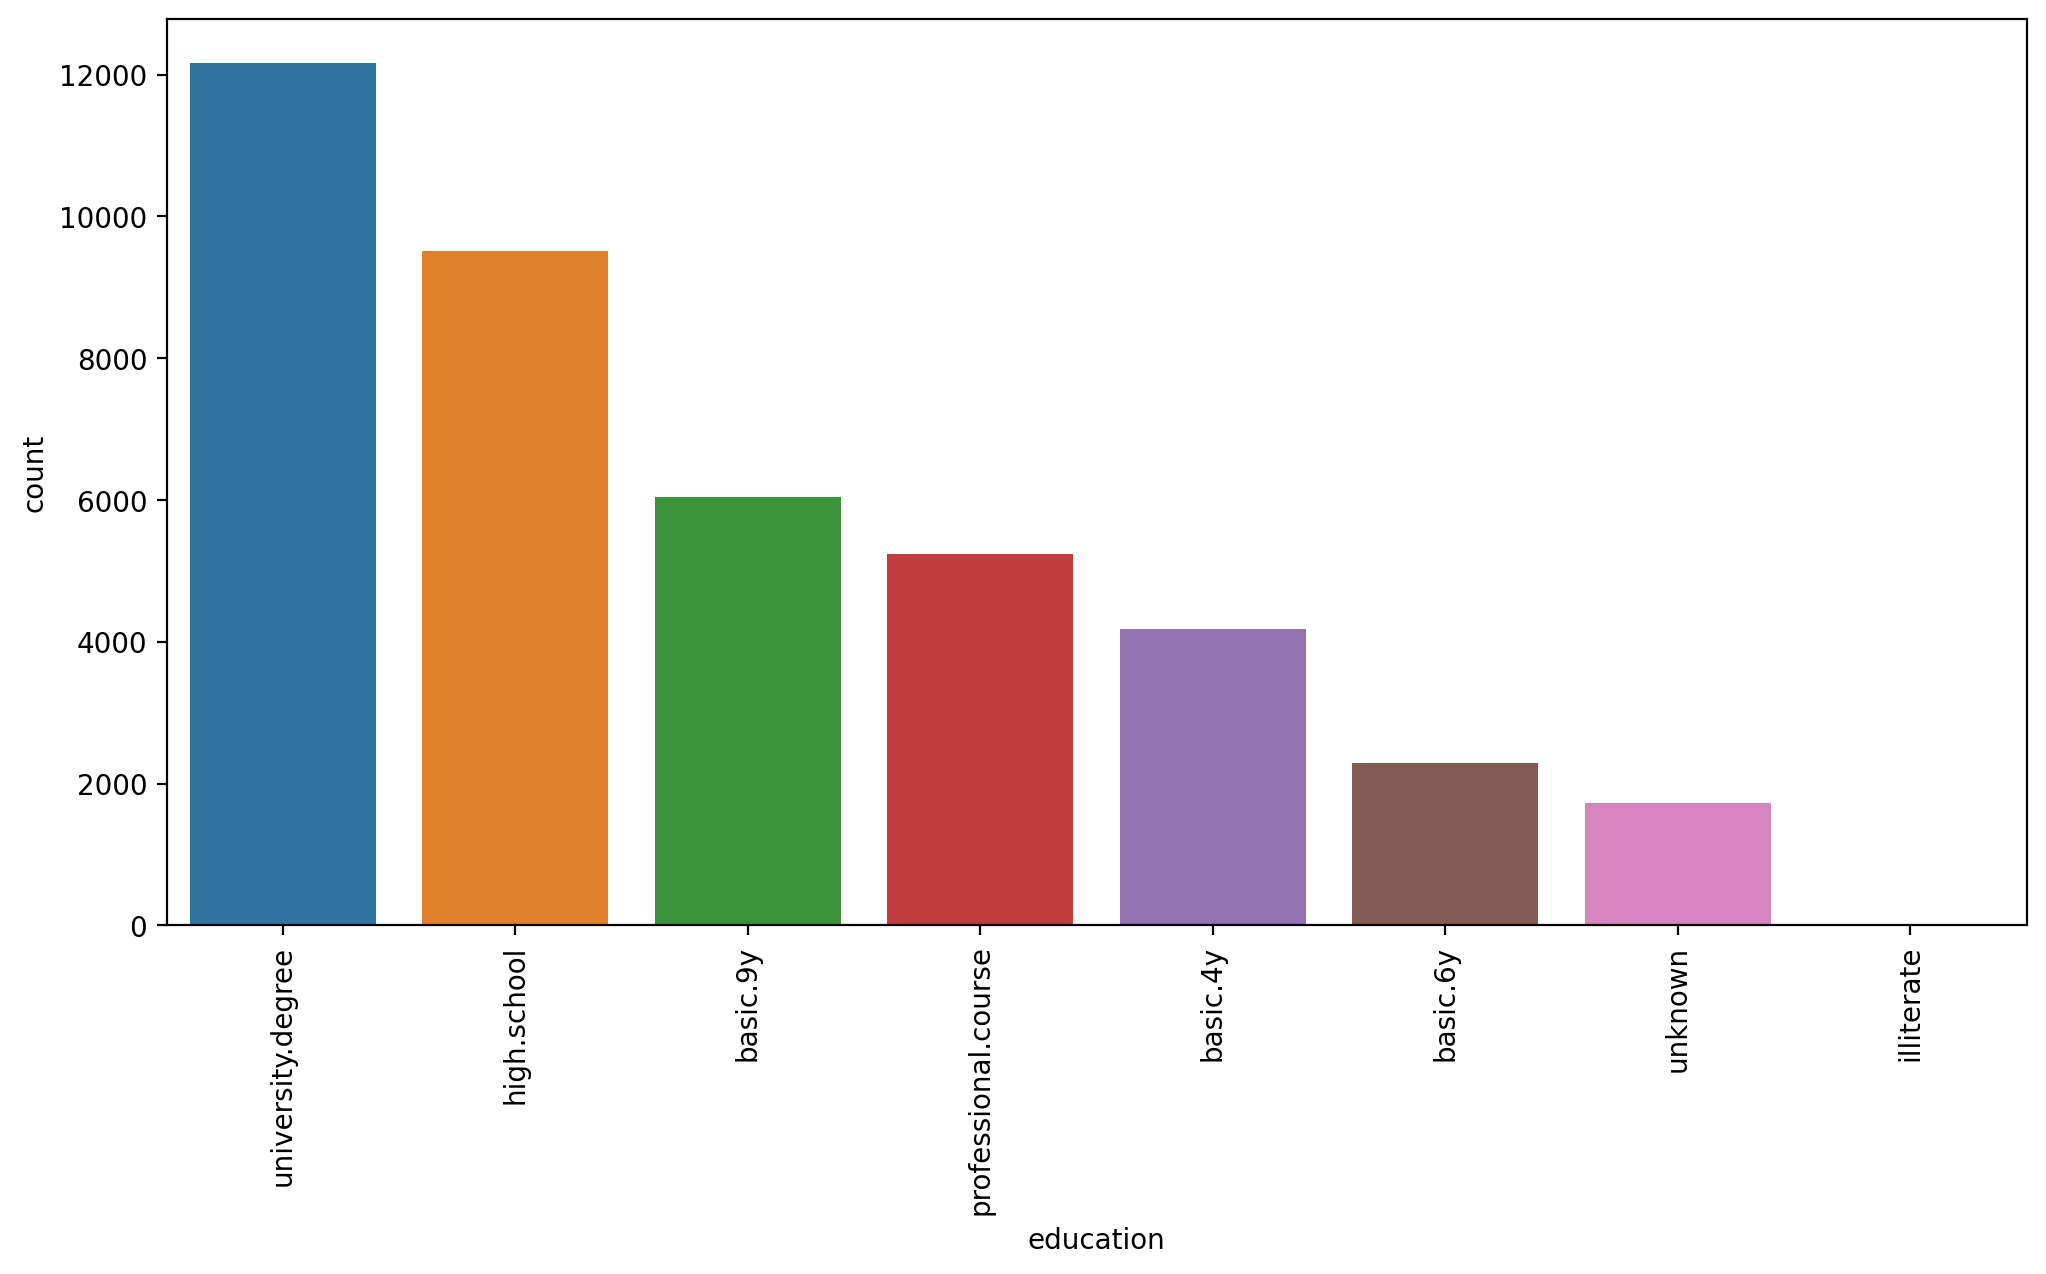

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

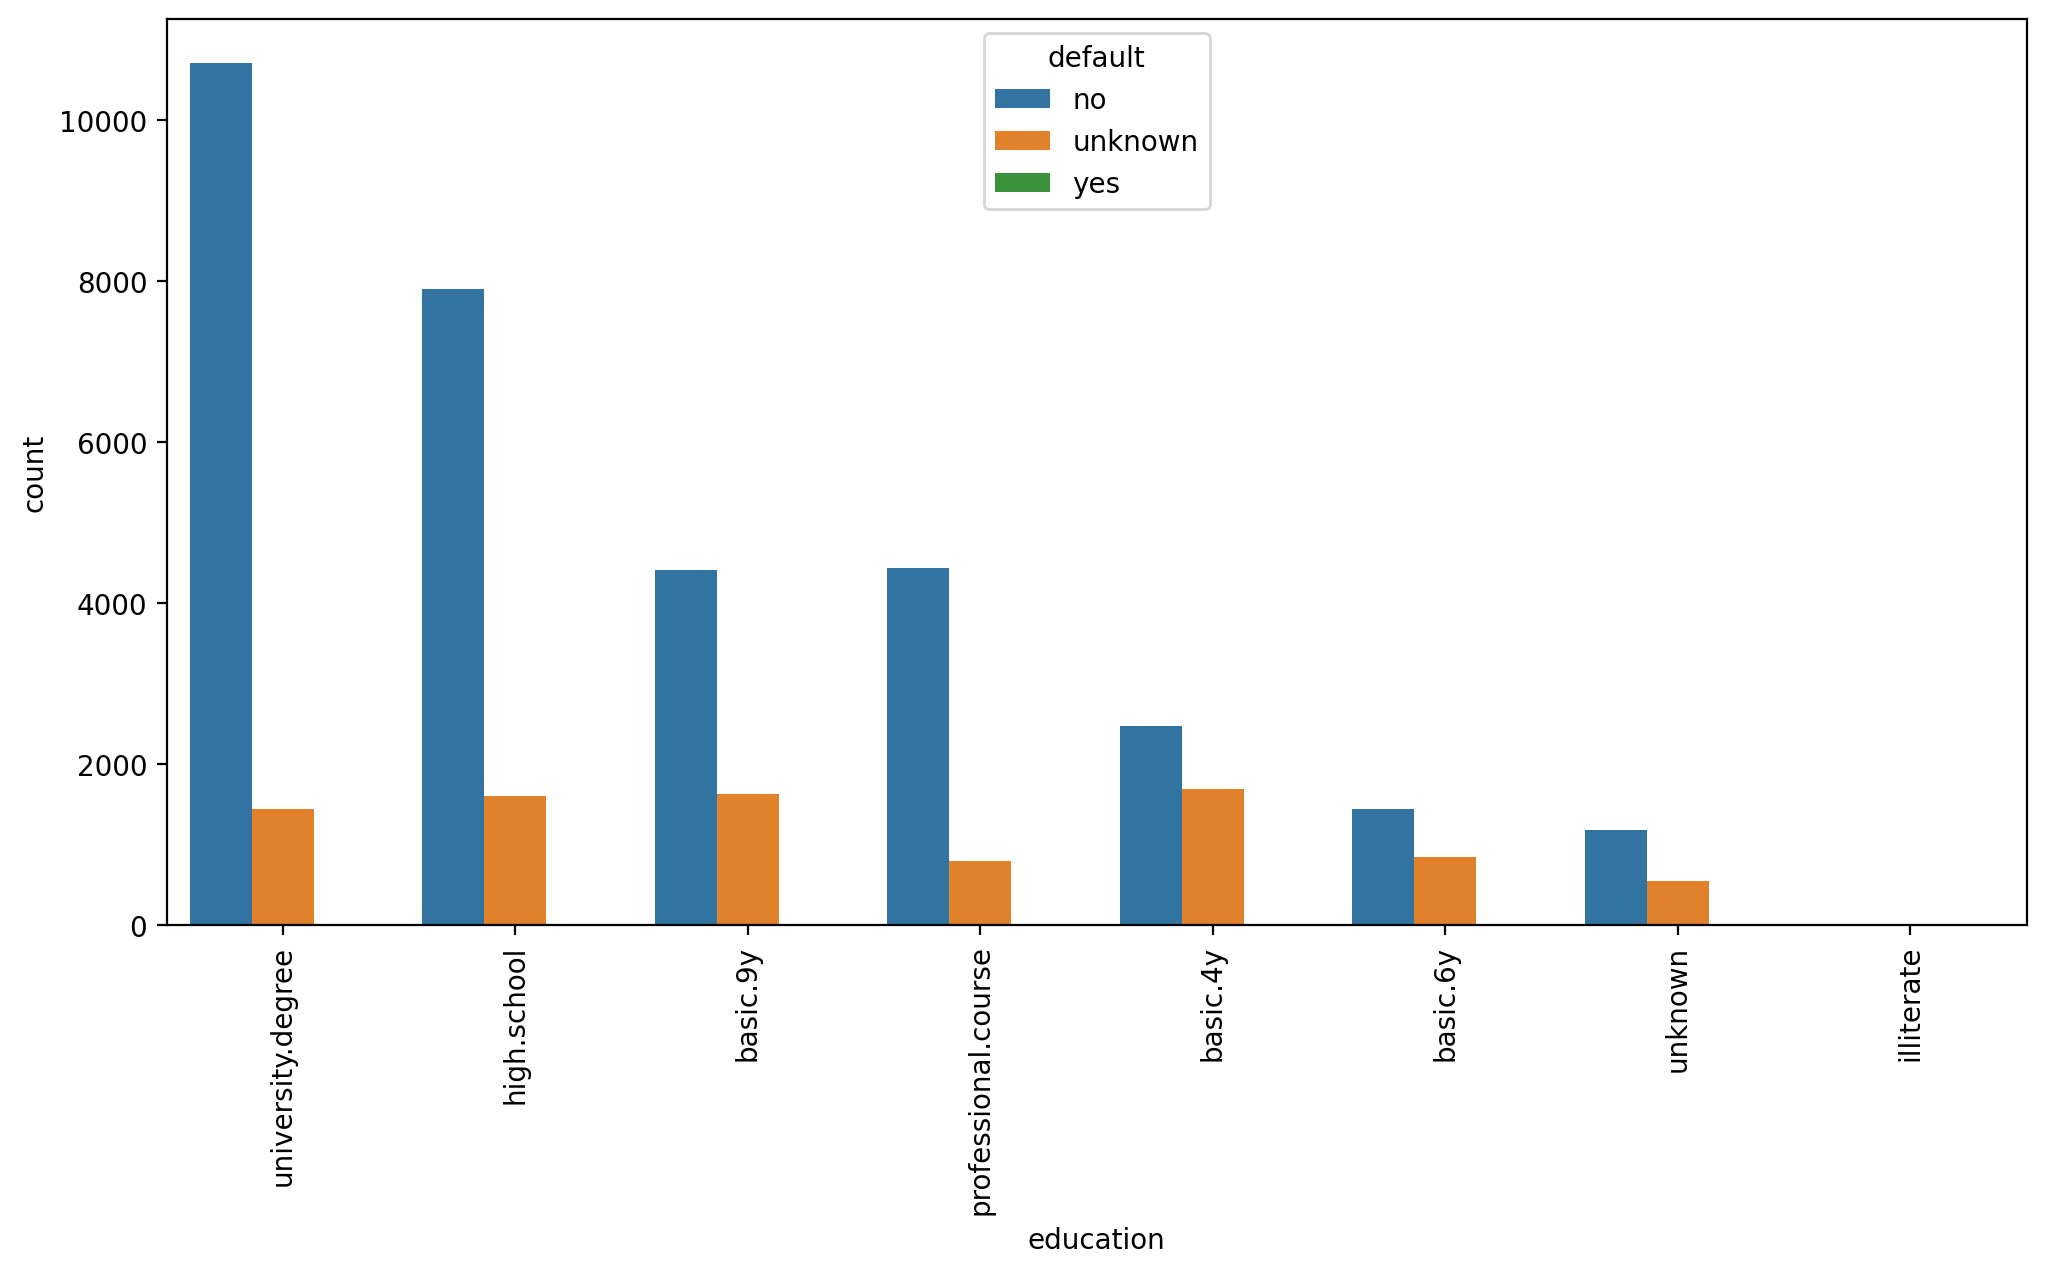

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

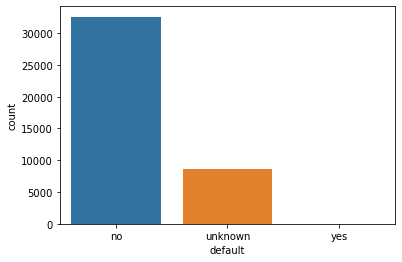

In [19]:
sns.countplot(data=df, x="default")

In [20]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [21]:
df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [22]:
# sns.pairplot(df)

## ML MODEL

In [23]:
X = pd.get_dummies(df)

In [24]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_x = scaler.fit_transform(X)

In [28]:
from sklearn.cluster import KMeans

In [29]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [30]:
model = KMeans(n_clusters=2)

In [31]:
cluster_label = model.fit_predict(scaled_x)

In [32]:
cluster_label

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
X["cluster"] = cluster_label

In [34]:
X.corr()["cluster"].iloc[:-1].sort_values()

previous               -0.478493
poutcome_failure       -0.464320
contact_cellular       -0.410444
month_apr              -0.357942
subscribed_yes         -0.294472
                          ...   
poutcome_nonexistent    0.544406
cons.price.idx          0.679350
nr.employed             0.886190
emp.var.rate            0.932622
euribor3m               0.959328
Name: cluster, Length: 65, dtype: float64

<AxesSubplot:>

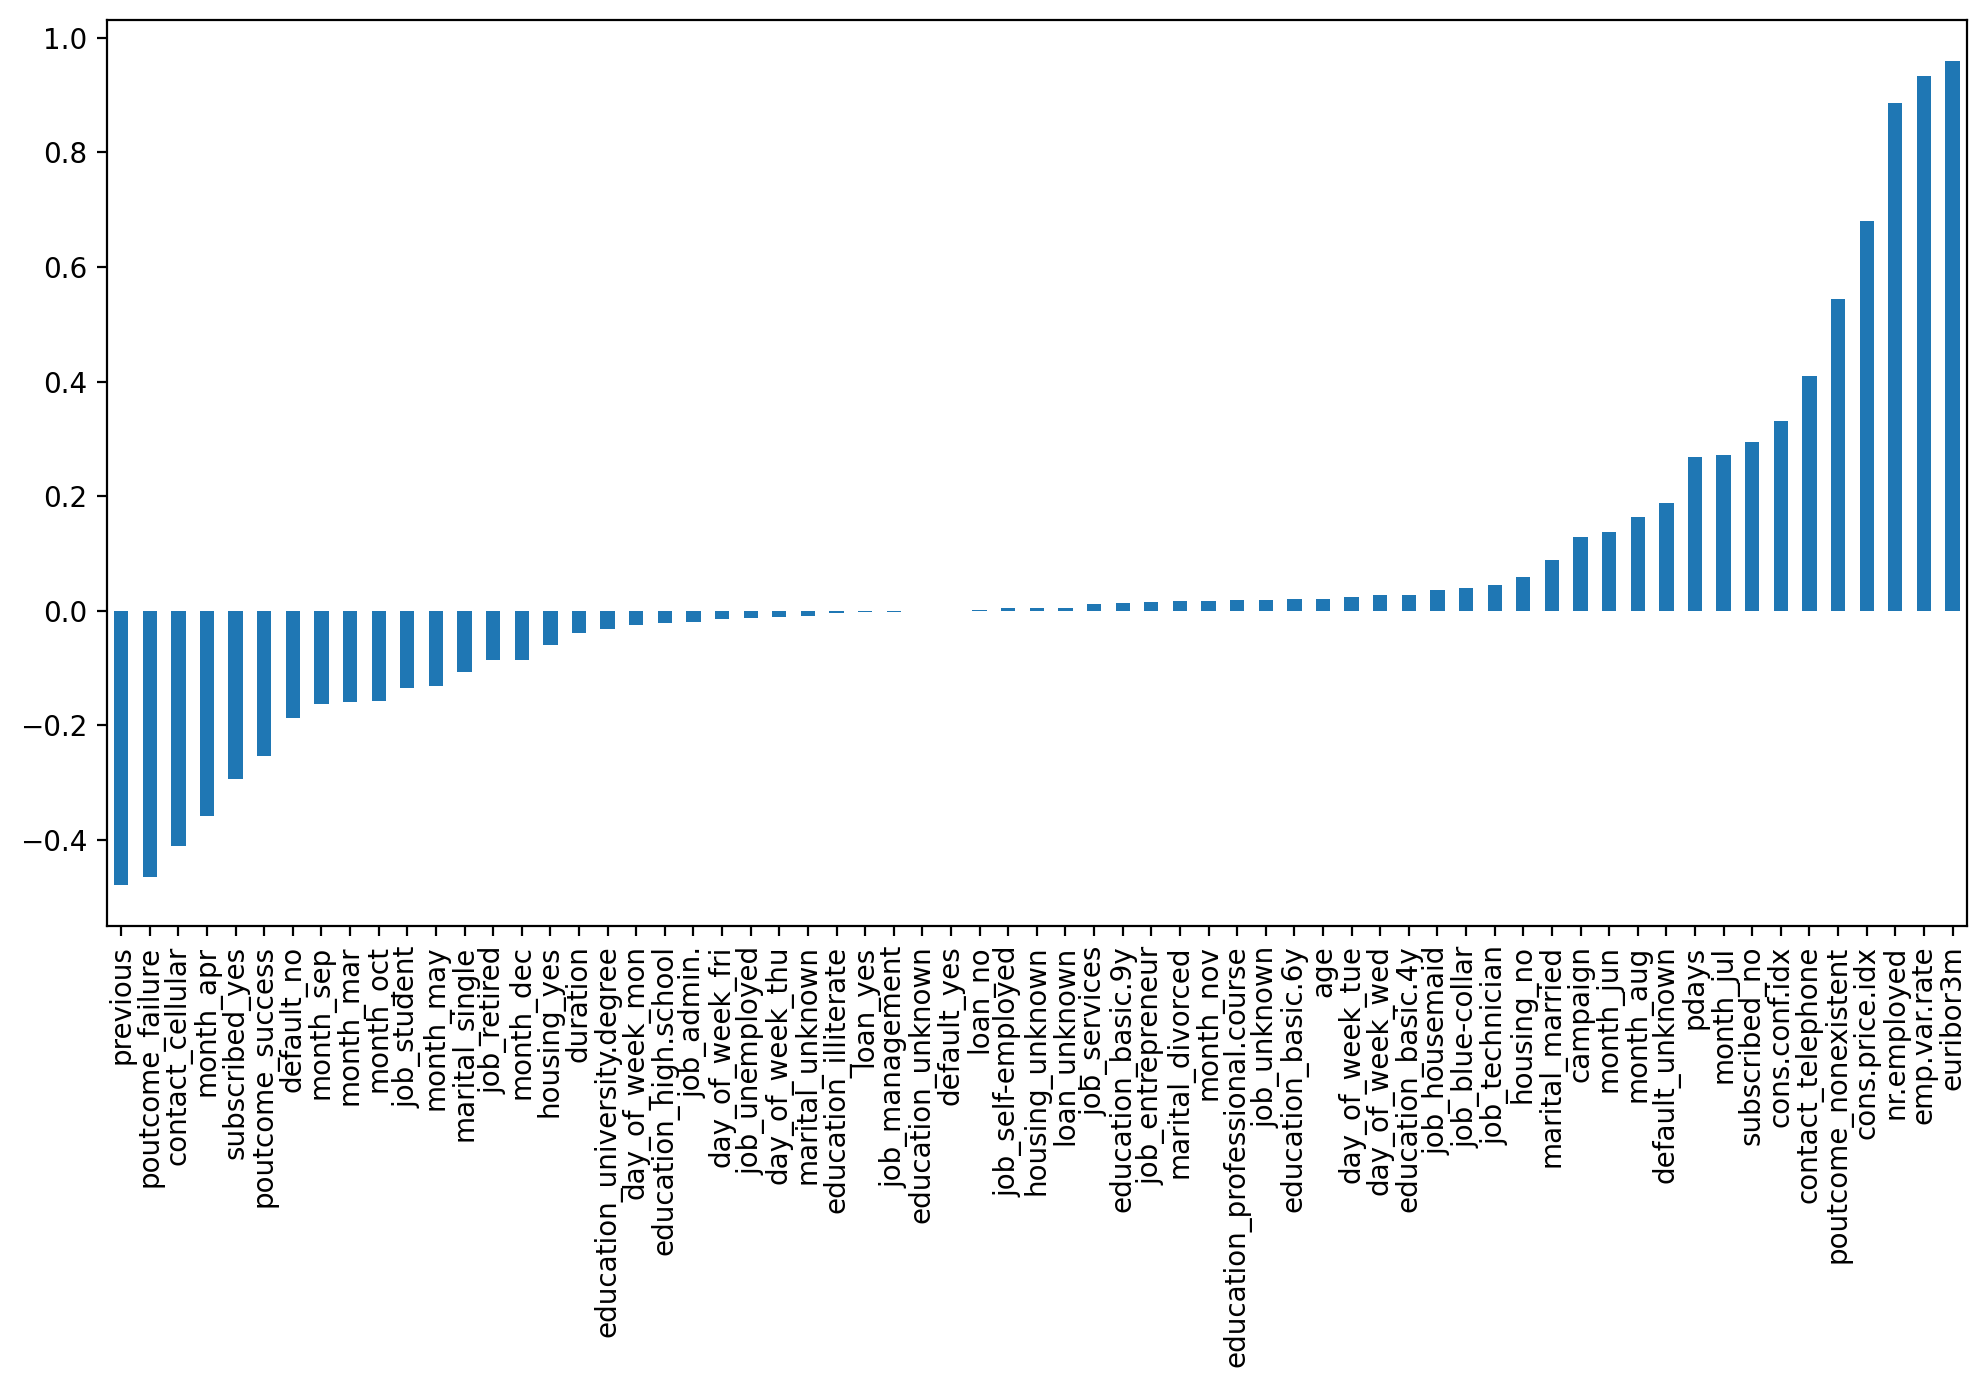

In [35]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing K Value

In [36]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters= k)
    model.fit(scaled_x)

    ssd.append(model.inertia_)
    # Sum of squared distances of samples to their closest cluster center.

In [37]:
ssd

[2469792.361662774,
 2370786.395145258,
 2271502.7007717513,
 2200693.6837570146,
 2157641.2105467105,
 2120832.493472484,
 2044202.2660021302,
 2002070.5765323017]

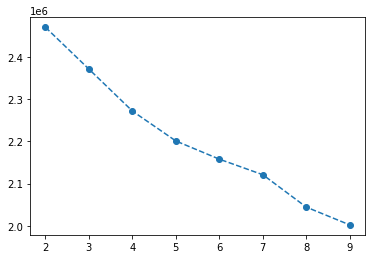

In [38]:
plt.plot(range(2,10), ssd, "o--")

In [39]:
pd.Series(ssd)

0    2.469792e+06
1    2.370786e+06
2    2.271503e+06
3    2.200694e+06
4    2.157641e+06
5    2.120832e+06
6    2.044202e+06
7    2.002071e+06
dtype: float64

In [40]:
pd.Series(ssd).diff()
# Önceki satırla arasındaki farkı verir

0             NaN
1   -99005.966518
2   -99283.694374
3   -70809.017015
4   -43052.473210
5   -36808.717074
6   -76630.227470
7   -42131.689470
dtype: float64

<AxesSubplot:>

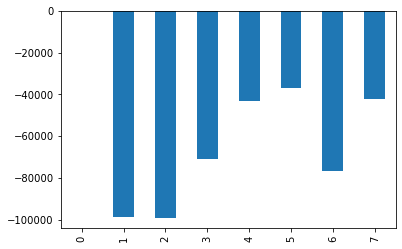

In [41]:
pd.Series(ssd).diff().plot(kind='bar')